# 01 - Data Exploration & Profiling

**Objective:** Load the Flickr dataset, understand its schema, and identify data quality issues.

## Schema
| Column | Description |
|--------|-------------|
| id | Photo ID |
| user | Flickr user ID |
| lat, long | GPS coordinates |
| tags | Comma-separated tags |
| title | Photo title |
| date_taken_* | When photo was taken (minute, hour, day, month, year) |
| date_upload_* | When photo was uploaded |

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Load Dataset

In [62]:
# Load the dataset
DATA_PATH = '../data/flickr_data2.csv'

df = pd.read_csv(DATA_PATH)

# Clean column names (strip whitespace and remove empty columns)
df.columns = df.columns.str.strip()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(df.shape)
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

/var/folders/07/g6c3ynvs50j_z_fwcr9sy9rh0000gn/T/ipykernel_57802/3938270652.py:4: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


(420240, 16)
Dataset shape: 420,240 rows × 16 columns

Memory usage: 204.88 MB


In [63]:
# First look at the data
df.head(10)


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0
5,4394566432,16197488@N06,45.755940,4.833158,"poste,lyon,streetphotography,rue,gens",NaN,57.0,12,27,2,2010,1,10,28.0,2,2010.0
6,4393799139,16197488@N06,45.754289,4.832257,"lyon,streetphotography,rue,gens",NaN,8.0,11,27,2,2010,1,10,28.0,2,2010.0
7,4394565970,16197488@N06,45.774662,4.834005,"lyon,streetphotography,rue,montblanc,gens,montagnes,croixrousse,groscailloux",NaN,23.0,10,27,2,2010,0,10,28.0,2,2010.0
8,4392370105,47924539@N05,45.762328,4.827547,"france,lyon,lesphotosdevoyage",Courette Lyonnaise,29.0,12,27,2,2010,29,21,27.0,2,2010.0
9,4392367159,47924539@N05,45.762059,4.822654,"france,lyon,fourvière,lesphotosdevoyage",Fourvière,28.0,12,27,2,2010,28,21,27.0,2,2010.0


In [64]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  420240 non-null  int64  
 1   user                420240 non-null  object 
 2   lat                 420240 non-null  float64
 3   long                420240 non-null  float64
 4   tags                316730 non-null  object 
 5   title               381911 non-null  object 
 6   date_taken_minute   420239 non-null  float64
 7   date_taken_hour     420240 non-null  int64  
 8   date_taken_day      420240 non-null  int64  
 9   date_taken_month    420240 non-null  int64  
 10  date_taken_year     420240 non-null  int64  
 11  date_upload_minute  420228 non-null  object 
 12  date_upload_hour    420238 non-null  object 
 13  date_upload_day     420238 non-null  float64
 14  date_upload_month   420240 non-null  int64  
 15  date_upload_year    420239 non-nul

## 2. Missing Values Analysis

=== Missing Values ===
                    missing_count  missing_pct
tags                       103510        24.63
title                       38329         9.12
date_taken_minute               1         0.00
date_upload_minute             12         0.00
date_upload_hour                2         0.00
date_upload_day                 2         0.00
date_upload_year                1         0.00


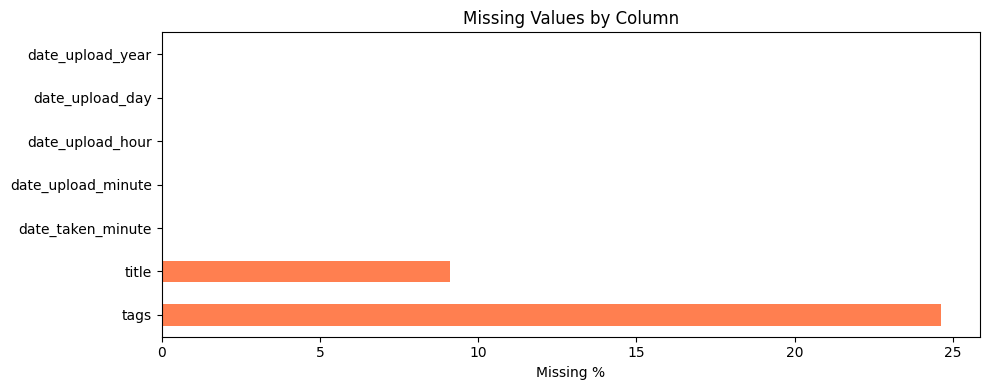

In [65]:
# Calculate missing values
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_pct': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing[missing['missing_count'] > 0].sort_values('missing_pct', ascending=False)

print("=== Missing Values ===")
if len(missing) > 0:
    print(missing)
else:
    print("No missing values found!")

# Visualize
if len(missing) > 0:
    fig, ax = plt.subplots(figsize=(10, 4))
    missing['missing_pct'].plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Missing %')
    ax.set_title('Missing Values by Column')
    plt.tight_layout()
    plt.show()

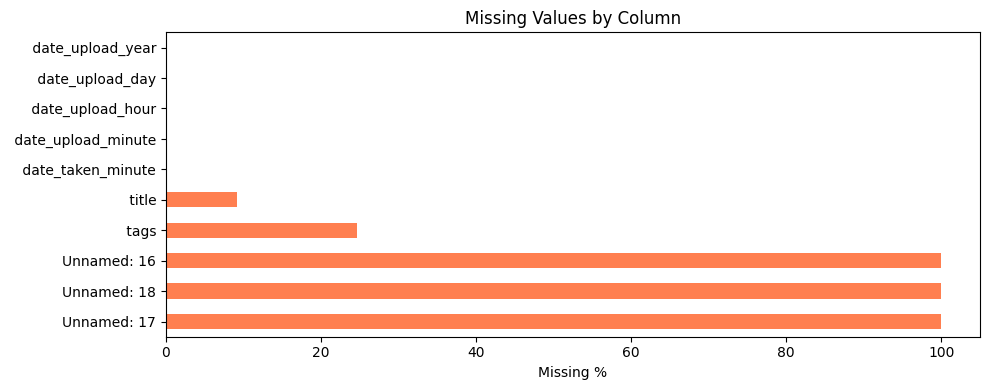

## 3. Duplicates Detection

In [66]:
# Check for duplicate photo IDs
dup_id = df['id'].duplicated().sum()
print(f"Duplicate photo IDs: {dup_id:,} ({dup_id/len(df)*100:.2f}%)")

# Check for exact duplicate rows
dup_rows = df.duplicated().sum()
print(f"Exact duplicate rows: {dup_rows:,} ({dup_rows/len(df)*100:.2f}%)")

# Check for duplicate coordinates (same user, same location)
dup_coords = df.duplicated(subset=['user', 'lat', 'long']).sum()
print(f"Duplicate (user + coordinates): {dup_coords:,} ({dup_coords/len(df)*100:.2f}%)")

Duplicate photo IDs: 252,143 (60.00%)
Exact duplicate rows: 232,642 (55.36%)
Duplicate (user + coordinates): 351,179 (83.57%)


In [67]:
# Show some duplicates if they exist
if dup_id > 0:
    dup_ids = df[df['id'].duplicated(keep=False)]['id'].unique()[:5]
    print("Sample duplicate photo IDs:")
    display(df[df['id'].isin(dup_ids)].head(10))

Sample duplicate photo IDs:


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0
4643,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0
4644,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0
4645,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0
4646,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0
4647,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0


In [68]:
# Investigate what the "duplicates" really are
sample_dup_id = df[df['id'].duplicated(keep=False)]['id'].iloc[0]
print(f"Looking at all rows for photo ID: {sample_dup_id}")
display(df[df['id'] == sample_dup_id])

Looking at all rows for photo ID: 4395181099


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,4395181099,30624617@N03,45.754858,4.82171,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0
4643,4395181099,30624617@N03,45.754858,4.82171,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0
9248,4395181099,30624617@N03,45.754858,4.82171,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0
13836,4395181099,30624617@N03,45.754858,4.82171,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0


## 4. GPS Coordinates Analysis

In [69]:
# GPS statistics
print("=== GPS Coordinate Statistics ===")
print(f"\nLatitude range:  [{df['lat'].min():.6f}, {df['lat'].max():.6f}]")
print(f"Longitude range: [{df['long'].min():.6f}, {df['long'].max():.6f}]")

# Lyon approximate bounding box
LYON_LAT_MIN, LYON_LAT_MAX = 45.55, 45.95
LYON_LON_MIN, LYON_LON_MAX = 4.65, 5.10

# Check for coordinates outside Lyon area
outside_lyon = df[
    (df['lat'] < LYON_LAT_MIN) | (df['lat'] > LYON_LAT_MAX) |
    (df['long'] < LYON_LON_MIN) | (df['long'] > LYON_LON_MAX)
]
print(f"\nPoints outside Lyon area: {len(outside_lyon):,} ({len(outside_lyon)/len(df)*100:.2f}%)")

# Check for null/invalid coordinates
null_coords = df[df['lat'].isnull() | df['long'].isnull()]
print(f"Null coordinates: {len(null_coords):,}")

# Check for (0, 0) coordinates
zero_coords = df[(df['lat'] == 0) & (df['long'] == 0)]
print(f"Zero coordinates (0, 0): {len(zero_coords):,}")

=== GPS Coordinate Statistics ===

Latitude range:  [45.655200, 45.854950]
Longitude range: [4.720312, 5.006709]

Points outside Lyon area: 0 (0.00%)
Null coordinates: 0
Zero coordinates (0, 0): 0


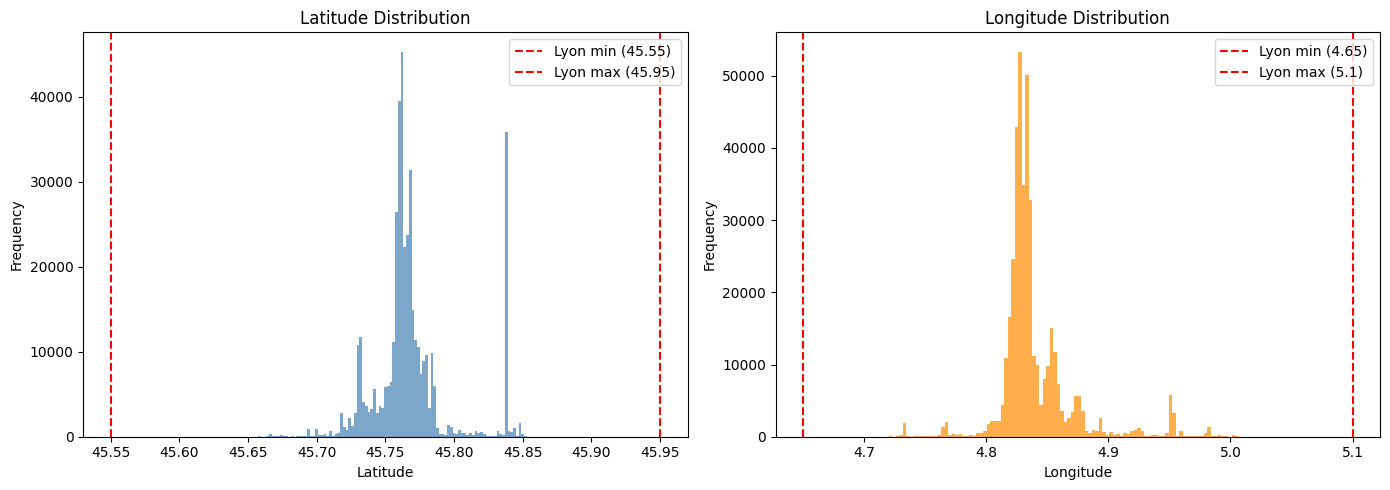

In [70]:
# Visualize coordinate distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of latitudes
axes[0].hist(df['lat'], bins=100, color='steelblue', alpha=0.7)
axes[0].axvline(LYON_LAT_MIN, color='red', linestyle='--', label=f'Lyon min ({LYON_LAT_MIN})')
axes[0].axvline(LYON_LAT_MAX, color='red', linestyle='--', label=f'Lyon max ({LYON_LAT_MAX})')
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Latitude Distribution')
axes[0].legend()

# Histogram of longitudes
axes[1].hist(df['long'], bins=100, color='darkorange', alpha=0.7)
axes[1].axvline(LYON_LON_MIN, color='red', linestyle='--', label=f'Lyon min ({LYON_LON_MIN})')
axes[1].axvline(LYON_LON_MAX, color='red', linestyle='--', label=f'Lyon max ({LYON_LON_MAX})')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Longitude Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

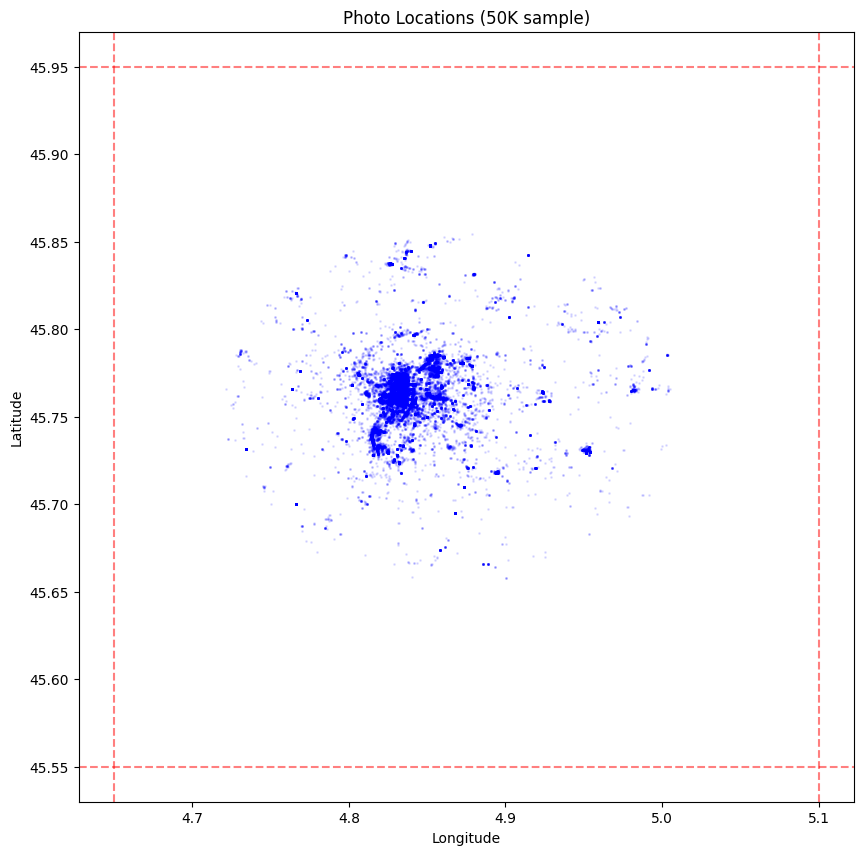

In [71]:
# Scatter plot of coordinates
fig, ax = plt.subplots(figsize=(10, 10))

# Sample for performance
sample = df.sample(min(50000, len(df)), random_state=42)
ax.scatter(sample['long'], sample['lat'], alpha=0.1, s=1, c='blue')

# Draw Lyon bounding box
ax.axhline(LYON_LAT_MIN, color='red', linestyle='--', alpha=0.5)
ax.axhline(LYON_LAT_MAX, color='red', linestyle='--', alpha=0.5)
ax.axvline(LYON_LON_MIN, color='red', linestyle='--', alpha=0.5)
ax.axvline(LYON_LON_MAX, color='red', linestyle='--', alpha=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Photo Locations (50K sample)')
plt.show()

## 5. Date Analysis

In [72]:
# Reconstruct datetime from components
date_cols = ['date_taken_year', 'date_taken_month', 'date_taken_day', 
             'date_taken_hour', 'date_taken_minute']

print("=== Date Component Statistics ===")
for col in date_cols:
    if col in df.columns:
        print(f"{col}: min={df[col].min()}, max={df[col].max()}, null={df[col].isnull().sum()}")

=== Date Component Statistics ===
date_taken_year: min=1, max=2238, null=0
date_taken_month: min=1, max=2011, null=0
date_taken_day: min=1, max=2013, null=0
date_taken_hour: min=0, max=2013, null=0
date_taken_minute: min=0.0, max=2019.0, null=1


In [73]:
# Find rows with obviously wrong values
bad_rows = df[
    (df['date_taken_month'] > 12) | 
    (df['date_taken_day'] > 31) | 
    (df['date_taken_hour'] > 23) |
    (df['date_taken_minute'] > 59)
]
print(f"Rows with invalid date components: {len(bad_rows)}")
display(bad_rows.head(10))

Rows with invalid date components: 143


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
42366,5464485473,35635047@N03,45.765517,4.766510,"lundimatin,lyondefi38nuit",une lundi matin comme tout les autre ;-(25,6.0,21,2,2011,11,15,21,2.0,2011,NaN
85950,6674970791,29713277@N02,45.753948,4.788145,"portrait,throughtheleaves,autraversdesfeuillages",NaN,2012.0,29,12,10,9,NaN,47,21.0,10,1.0
90872,6674970791,29713277@N02,45.753948,4.788145,"portrait,throughtheleaves,autraversdesfeuillages",NaN,2012.0,29,12,10,9,NaN,47,21.0,10,1.0
98808,7386785280,37290448@N04,45.771315,4.835829,"city,plants,plant,france,brick,green,stone,wall,french,lyon,stones,bricks,creative,commons,cc,cr...",Plant,2012.0,17,9,6,6,Stone,32,17.0,17,6.0
98816,7387000024,38586649@N00,45.779196,4.853596,"uploaded:by=flicksquare,foursquare:venue=4b851cb1f964a5207a4c31e3,geo:lat=45779196981146825,geo:...",Beautiful weather in #Lyon,2012.0,46,11,17,6,),46,17.0,17,6.0
102366,7583546064,37290448@N04,45.772827,4.841065,"city,blackandwhite,france,water,river,french,concrete,flow,lyon,cement,creative,commons,cc,creat...",Bridge,2012.0,38,11,7,6,Rhône,5,18.0,16,7.0
102720,7527657538,43706323@N03,45.769222,4.830549,"square,lofi,squareformat,iphoneography,instagramapp,uploaded:by=instagram,foursquare:venue=4b530...",Le marathon de la bouffe continue,2012.0,49,16,8,7,),49,16.0,8,7.0
103681,7387000024,38586649@N00,45.779196,4.853596,"uploaded:by=flicksquare,foursquare:venue=4b851cb1f964a5207a4c31e3,geo:lat=45779196981146825,geo:...",Beautiful weather in #Lyon,2012.0,46,11,17,6,),46,17.0,17,6.0
103685,7386785280,37290448@N04,45.771315,4.835829,"city,plants,plant,france,brick,green,stone,wall,french,lyon,stones,bricks,creative,commons,cc,cr...",Plant,2012.0,17,9,6,6,Stone,32,17.0,17,6.0
106983,7583546064,37290448@N04,45.772827,4.841065,"city,blackandwhite,france,water,river,french,concrete,flow,lyon,cement,creative,commons,cc,creat...",Bridge,2012.0,38,11,7,6,Rhône,5,18.0,16,7.0


In [74]:
# Step 1: Check corrupted dates ONLY
df_raw = df.copy()

bad_dates = df[
    (df['date_taken_month'] > 12) | 
    (df['date_taken_day'] > 31) | 
    (df['date_taken_hour'] > 23) |
    (df['date_taken_minute'] > 59)
]
print(f"Corrupted date rows: {len(bad_dates):,} ({len(bad_dates)/len(df)*100:.2f}%)")

# Step 2: Remove corrupted dates
df = df[
    (df['date_taken_month'] <= 12) & 
    (df['date_taken_day'] <= 31) & 
    (df['date_taken_hour'] <= 23) &
    (df['date_taken_minute'] <= 59)
]
print(f"After date fix: {len(df):,}")

# Step 3: Remove exact duplicates 
df = df.drop_duplicates()
print(f"Raw: {len(df_raw):,} → Clean: {len(df):,}")

print(f"After removing exact duplicates: {len(df):,}")

Corrupted date rows: 143 (0.03%)
After date fix: 420,097
Raw: 420,240 → Clean: 187,544
After removing exact duplicates: 187,544


In [75]:
# Create datetime column
def create_datetime(row):
    try:
        return datetime(
            int(row['date_taken_year']),
            int(row['date_taken_month']),
            int(row['date_taken_day']),
            int(row['date_taken_hour']),
            int(row['date_taken_minute'])
        )
    except:
        return None

# Apply to sample first to check for issues
sample_dates = df.head(1000).apply(create_datetime, axis=1)
invalid_dates = sample_dates.isnull().sum()
print(f"Invalid dates in first 1000 rows: {invalid_dates}")

# Check for unrealistic date ranges
print(f"\nYear range: {df['date_taken_year'].min()} - {df['date_taken_year'].max()}")
print(f"Future dates (year > 2026): {(df['date_taken_year'] > 2026).sum()}")
print(f"Very old dates (year < 2000): {(df['date_taken_year'] < 2000).sum()}")

Invalid dates in first 1000 rows: 0

Year range: 1926 - 2238
Future dates (year > 2026): 1
Very old dates (year < 2000): 178


In [76]:
# Remove obviously impossible dates
df = df[
    (df['date_taken_year'] >= 1990) &  # Reasonable digital photo era
    (df['date_taken_year'] <= 2025)    # Not in the future
]

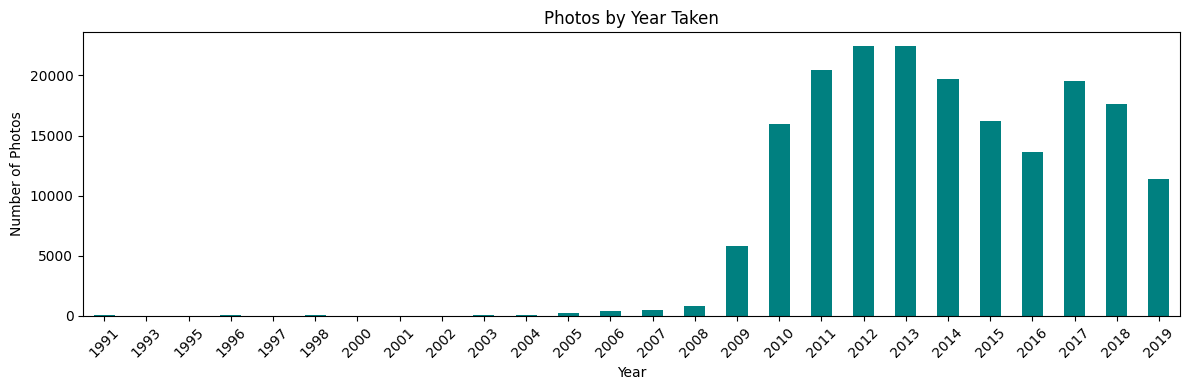

In [77]:
# Year distribution
fig, ax = plt.subplots(figsize=(12, 4))
df['date_taken_year'].value_counts().sort_index().plot(kind='bar', ax=ax, color='teal')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Photos')
ax.set_title('Photos by Year Taken')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

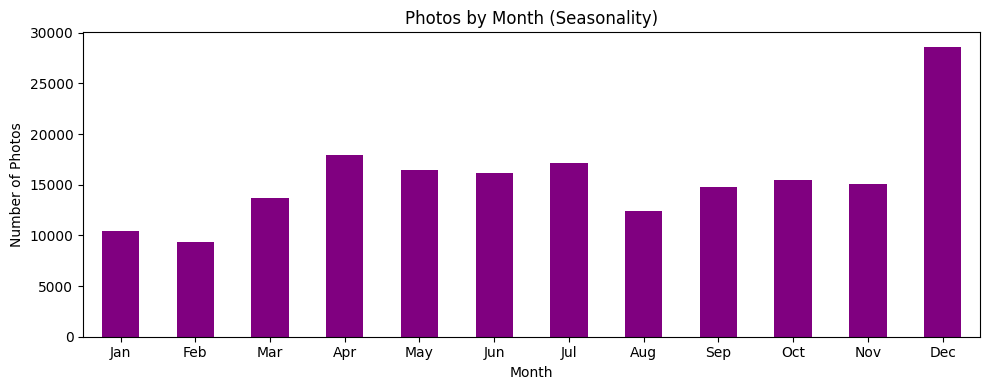

In [78]:
# Month distribution
fig, ax = plt.subplots(figsize=(10, 4))
month_counts = df['date_taken_month'].value_counts().sort_index()
month_counts.plot(kind='bar', ax=ax, color='purple')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Photos')
ax.set_title('Photos by Month (Seasonality)')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()

## 6. Text Analysis (Tags & Titles)

In [79]:
# Tags analysis
print("=== Tags Analysis ===")
empty_tags = df['tags'].isnull() | (df['tags'] == '')
print(f"Photos without tags: {empty_tags.sum():,} ({empty_tags.sum()/len(df)*100:.1f}%)")

# Count tags per photo
def count_tags(tag_str):
    if pd.isna(tag_str) or tag_str == '':
        return 0
    return len(str(tag_str).split(','))

df['tag_count'] = df['tags'].apply(count_tags)
print(f"\nTags per photo: mean={df['tag_count'].mean():.1f}, median={df['tag_count'].median():.0f}, max={df['tag_count'].max()}")

=== Tags Analysis ===
Photos without tags: 46,949 (25.0%)

Tags per photo: mean=11.4, median=5, max=75


In [80]:
# Most common tags
all_tags = []
for tags in df['tags'].dropna():
    all_tags.extend([t.strip().lower() for t in str(tags).split(',') if t.strip()])

from collections import Counter
tag_counts = Counter(all_tags)
print("\n=== Top 30 Tags ===")
for tag, count in tag_counts.most_common(30):
    print(f"{tag}: {count:,}")


=== Top 30 Tags ===
lyon: 85,956
france: 63,316
streetart: 19,247
architecture: 16,696
museum: 16,050
art: 16,022
demeureduchaos: 15,758
abodeofchaos: 15,645
thierryehrmann: 15,253
painting: 14,750
contemporaryart: 14,626
alchemy: 14,606
portrait: 14,560
prophecy: 14,522
999: 14,466
symbol: 14,425
organmuseum: 14,420
mystery: 14,392
secret: 14,320
lespritdelasalamandre: 14,269
ddc: 14,188
salamanderspirit: 14,172
saintromainaumontdor: 13,935
sanctuary: 13,405
cyberpunk: 13,292
artistshouses: 13,054
modernsculpture: 12,999
dadaisme: 12,983
911: 12,982
maisondartiste: 12,968


In [81]:
# Title analysis
print("\n=== Title Analysis ===")
empty_titles = df['title'].isnull() | (df['title'] == '')
print(f"Photos without title: {empty_titles.sum():,} ({empty_titles.sum()/len(df)*100:.1f}%)")

# Title length
df['title_len'] = df['title'].fillna('').apply(len)
print(f"Title length: mean={df['title_len'].mean():.1f}, median={df['title_len'].median():.0f}, max={df['title_len'].max()}")


=== Title Analysis ===
Photos without title: 16,961 (9.0%)
Title length: mean=26.1, median=18, max=255


In [87]:
# Sample titles
print("\n=== Sample Titles ===")
sample_titles = df[df['title'].notna() & (df['title'] != '')]['title'].sample(20, random_state=42)
for i, title in enumerate(sample_titles, 1):
    print(f"{i}. {title}")


=== Sample Titles ===
1. Vernissage_063
2. Confluence morning
3. Confluence, Lyon.
4. Japan Touch - 2013-11-30- Eurexpo - Lyon - 8631
5. Lyon (France).
6. Estampe japonaise
7. Lyon L005.
8. Course des Gones McDo
9. Slide 2
10. HERZOG de MEURON LYON-104
11. Sopra Steria
12. #III it's getting serious.
13. The Nail by thierry Ehrmann DDC_6082
14. Equita-Lyon-2012-gilles-forestier-2
15. Pasted paper [Lyon, France]
16. 2009-07-03-Lyon by night-057-gaelic.fr_DSC9662 copie
17. Place de la Croix-Rousse
18. IMG_3751
19. Place Louis-Pradel
20. Lyon-Lumieres09-18


## 7. User Analysis

In [88]:
# User statistics
print("=== User Statistics ===")
print(f"Unique users: {df['user'].nunique():,}")

photos_per_user = df['user'].value_counts()
print(f"\nPhotos per user: mean={photos_per_user.mean():.1f}, median={photos_per_user.median():.0f}")
print(f"Max photos by single user: {photos_per_user.max():,}")
print(f"Users with only 1 photo: {(photos_per_user == 1).sum():,}")

=== User Statistics ===
Unique users: 5,145

Photos per user: mean=36.4, median=4
Max photos by single user: 15,392
Users with only 1 photo: 1,253


In [84]:
# Top users
print("\n=== Top 10 Users by Photo Count ===")
print(photos_per_user.head(10))


=== Top 10 Users by Photo Count ===
user
40936370@N00     15392
113391938@N03     5689
90493526@N00      4901
83294602@N03      2546
48551155@N05      2478
32215553@N02      2196
87978098@N02      2107
10986181@N05      2069
34879782@N00      1906
75906220@N07      1876
Name: count, dtype: int64


## 8. Summary of Issues Found

Run this cell to generate a summary report.

In [85]:
print("="*60)
print("DATA QUALITY ISSUES SUMMARY")
print("="*60)

issues = []

# Duplicates
if dup_id > 0:
    issues.append(f"⚠️ Duplicate photo IDs: {dup_id:,}")
if dup_rows > 0:
    issues.append(f"⚠️ Exact duplicate rows: {dup_rows:,}")

# GPS
if len(null_coords) > 0:
    issues.append(f"⚠️ Null coordinates: {len(null_coords):,}")
if len(zero_coords) > 0:
    issues.append(f"⚠️ Zero (0,0) coordinates: {len(zero_coords):,}")
if len(outside_lyon) > 0:
    issues.append(f"⚠️ Points outside Lyon bbox: {len(outside_lyon):,}")

# Dates
future = (df['date_taken_year'] > 2026).sum()
old = (df['date_taken_year'] < 2000).sum()
if future > 0:
    issues.append(f"⚠️ Future dates (>2026): {future:,}")
if old > 0:
    issues.append(f"⚠️ Very old dates (<2000): {old:,}")

# Text
if empty_tags.sum() > len(df) * 0.1:
    issues.append(f"ℹ️ Photos without tags: {empty_tags.sum():,} ({empty_tags.sum()/len(df)*100:.1f}%)")
if empty_titles.sum() > len(df) * 0.1:
    issues.append(f"ℹ️ Photos without title: {empty_titles.sum():,} ({empty_titles.sum()/len(df)*100:.1f}%)")

if issues:
    for issue in issues:
        print(issue)
else:
    print("✅ No major issues found!")

print("\n" + "="*60)
print("NEXT STEPS: Data Cleaning")
print("="*60)
print("1. Remove duplicate rows/IDs")
print("2. Filter invalid GPS coordinates")
print("3. Handle date parsing issues")
print("4. Create cleaned Parquet file for efficiency")

DATA QUALITY ISSUES SUMMARY
⚠️ Duplicate photo IDs: 252,143
⚠️ Exact duplicate rows: 232,642
⚠️ Very old dates (<2000): 78
ℹ️ Photos without tags: 46,949 (25.0%)

NEXT STEPS: Data Cleaning
1. Remove duplicate rows/IDs
2. Filter invalid GPS coordinates
3. Handle date parsing issues
4. Create cleaned Parquet file for efficiency


---

## Save Profiling Results

In [86]:
# Save intermediate results
profiling_stats = {
    'total_rows': len(df),
    'unique_users': df['user'].nunique(),
    'duplicate_ids': dup_id,
    'duplicate_rows': dup_rows,
    'null_coords': len(null_coords),
    'outside_lyon': len(outside_lyon),
    'empty_tags': empty_tags.sum(),
    'empty_titles': empty_titles.sum(),
    'year_range': (int(df['date_taken_year'].min()), int(df['date_taken_year'].max())),
    'lat_range': (df['lat'].min(), df['lat'].max()),
    'lon_range': (df['long'].min(), df['long'].max()),
}

import json
with open('../reports/profiling_stats.json', 'w') as f:
    json.dump(profiling_stats, f, indent=2, default=str)

print("Profiling stats saved to reports/profiling_stats.json")

Profiling stats saved to reports/profiling_stats.json


## 9. Conclusion & Next Steps

Based on the exploration above, here are the key takeaways and specific actions required for the data cleaning phase:

### Key Findings
1.  **Critical Duplication**: The dataset is heavily contaminated with duplicates. Over **60%** of photo IDs are duplicates, and **55%** of rows are exact matches. This suggests the data collection strategy fetched overlapping results significantly.
2.  **Spatial Integrity**: Surprisingly, GPS data is extremely clean. No points fall outside the broad Lyon bounding box, and there are no null or (0,0) coordinates.
3.  **Temporal Anomalies**: While most dates are valid, there are outliers (years as low as 1 and as high as 2238) that need filtering. Corrupted date components (month > 12, impossible years like 2238) due to CSV parsing/column shifting.
Resolution: remove_corrupted_dates() filters to valid dates (1990-2025)
4.  **Missing Metadata**: A significant portion (25%) of photos lack tags, which will impact clustering quality if not handled or imputed.
Dominant themes in top tags:


Location: 
lyon
, france, saintromainaumontdor
Art/Culture: streetart, museum, architecture, contemporaryart
Specific venue: Heavy representation from "Demeure du Chaos" art museum (~15k photos each for demeureduchaos, abodeofchaos, thierryehrmann)
⚠️ Note: The Demeure du Chaos venue accounts for ~8% of tagged photos, which may skew clustering results.

📝 Titles Analysis
Metric	Value
Photos without title	9% (16,961)
Mean title length	26.1 chars
Title patterns observed:

Descriptive location names (Place de la Croix-Rousse)
Generic filenames (IMG_3751, Slide 2)
Event-based (Japan Touch - 2013, Equita-Lyon-2012)
Date-stamped (2009-07-03-Lyon by night-057)


👤 User Distribution
Metric	Value
Unique users	5,145
Mean photos/user	36.4
Median photos/user	4
Max by single user	15,392
⚠️ Highly skewed distribution:

Top user has 15,392 photos (8% of dataset)
1,253 users have only 1 photo
Top 10 users account for ~22% of all photos


### Action Plan

Phase 1: Spatial Clustering (DBSCAN)
✅ Ready to proceed - Clean coordinates, valid geographic bounds

Phase 2: Text Mining
⚠️ Considerations needed:

Handle 25% tag-less photos (exclude or use title as fallback)
Normalize tag variations
Address Demeure du Chaos dominance
Consider user-weighted sampling to reduce bias


For the next stage of the pipeline (`src/data_loader.py` or `02_data_cleaning.ipynb`), we must implement:

*   Fill missing titles/tags with placeholder text (e.g., \"unknown\") to prevent errors during text processing.
*   Normalize tags (lowercase, strip whitespace) as part of the text mining pipeline.

